In [1]:
pip install tensorflow tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import glob
import numpy as np
from pathlib import Path

In [3]:
data_dir=Path(r'E:\DataScience\Rice Type Detection\RiceClassification\Data\Rice_Image_Dataset')

arborio=list(data_dir.glob('Arborio/*'))[:600]
basmati=list(data_dir.glob('Basmati/*'))[:600]
ipsala=list(data_dir.glob('Ipsala/*'))[:600]
jasmine=list(data_dir.glob('Jasmine/*'))[:600]
karacadag=list(data_dir.glob('Karacadag/*'))[:600]

In [4]:
df_images={
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag' : karacadag
}

df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4 
}

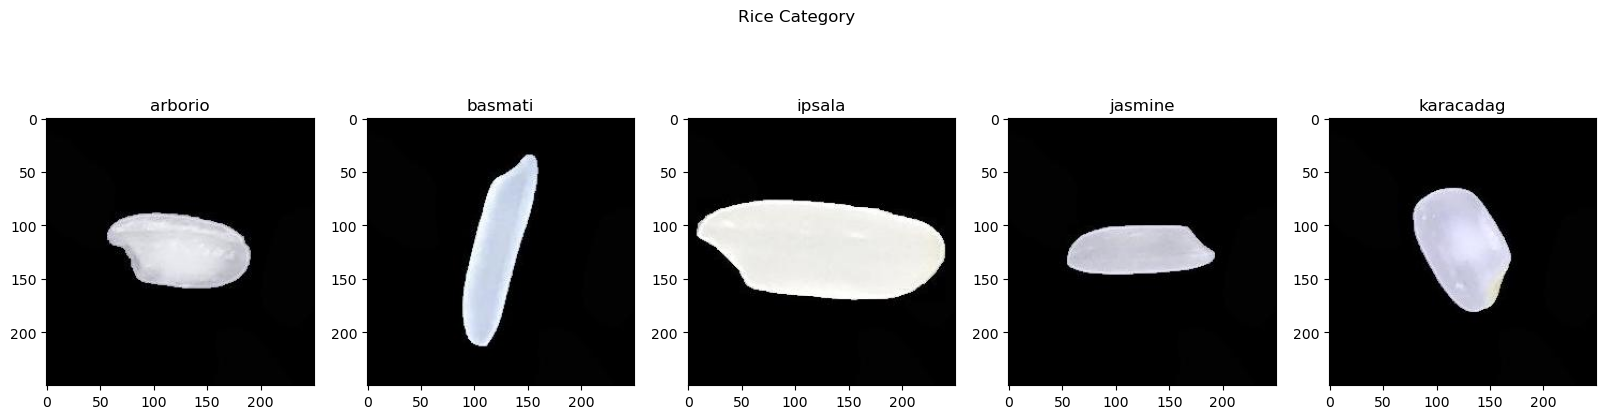

In [5]:
fig, ax=plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image=img.imread(arborio[0])
basmati_image=img.imread(basmati[0])
ipsala_image=img.imread(ipsala[0])
jasmine_image=img.imread(jasmine[0])
karacadag_image=img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [6]:
X, y= [], []
for label, images in df_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img, (224,224))
        X.append(resized_img)
        y.append(df_labels[label])

In [7]:
X=np.array(X)
X=X/255
y=np.array(y)

In [8]:
X_train, X_test_val, y_train, y_test_val=train_test_split(X, y)
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val)

In [9]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet

num_label = 5  # number of labels

# Load the MobileNet model without the top classification layer
mobile_net = MobileNet(include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Create a Sequential model and add MobileNet as the base
model = models.Sequential([
    mobile_net,
    layers.Dense(num_label, activation='softmax')
])

model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [15]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [16]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


c:\Users\Dhruv Garg\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - acc: 0.8866 - loss: 0.3554 - val_acc: 0.7394 - val_loss: 1.1981
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - acc: 0.9748 - loss: 0.0907 - val_acc: 0.7872 - val_loss: 0.9475
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - acc: 0.9720 - loss: 0.1120 - val_acc: 0.9574 - val_loss: 0.1104
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - acc: 0.9938 - loss: 0.0230 - val_acc: 1.0000 - val_loss: 0.0018
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - acc: 0.9944 - loss: 0.0154 - val_acc: 0.9947 - val_loss: 0.0139
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - acc: 0.9993 - loss: 0.0035 - val_acc: 0.9521 - val_loss: 0.1182
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - acc: 0.9919 - loss: 0.0305 - val_acc: 1.0000 - val_loss: 0.0017
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - acc: 0.9915 - loss: 0.0209 - val_acc: 1.0000 - val_loss: 0.0124
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - acc: 0.9937 - loss: 0.

In [17]:
model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - acc: 1.0000 - loss: 0.0025


[0.0019843829795718193, 1.0]

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 988ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00       116
           4       1.00      1.00      1.00       122

    accuracy                           1.00       562
   macro avg       1.00      1.00      1.00       562
weighted avg       1.00      1.00      1.00       562



In [19]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

In [20]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()

In [21]:
X_test[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [22]:
X_test.shape

(562, 224, 224, 3)

In [29]:
a1 = cv2.imread("E:\DataScience\Rice Type Detection\RiceClassification\Data\Rice_Image_Dataset\Arborio\Arborio (3).jpg")

In [30]:
a1 = cv2.resize(a1,(224,224))

In [31]:
a1 = np.array(a1)

In [32]:
a1 = a1/255

In [33]:
a1 = np.expand_dims(a1, 0)

In [34]:
pred = model.predict(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [36]:
pred = pred.argmax()
pred

0

In [37]:
for i, j in df_labels.items():
    if pred == j:
        print(i)

arborio


In [38]:
a2 = cv2.imread("E:\DataScience\Rice Type Detection\RiceClassification\Data\Rice_Image_Dataset\Karacadag\Karacadag (10).jpg")
a2 = cv2.resize(a2,(224,224))
a2 = np.array(a2)
a2 = a2/255
a2 = np.expand_dims(a2, 0)
a2.shape

(1, 224, 224, 3)

In [39]:
model.save("rice.h5")

ValueError: Unable to synchronously create dataset (name already exists)